In [1]:
%pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


In [2]:
from sklearn.neural_network import MLPClassifier    # Multi Layer Perceptron

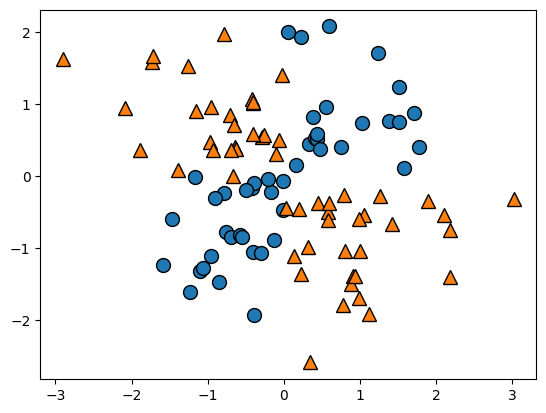

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

In [5]:
model_pctr = MLPClassifier(hidden_layer_sizes=()) #단일 퍼셉트론

In [6]:
model_pctr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=())

In [7]:
model_pctr.score(X_train, y_train)

0.35

In [8]:
model_pctr.score(X_test, y_test)

0.45

#### parameter
- activation  
1) default : relu  0보다 작을 땐 0, 0보다 크면 n  
2) logistic (sigmoid)  
3) tanh (sigmoid 일종)  
4) indentity : linear  

- solver  
1) default : adam  
2) lbfgs  
3) sgd : stochastic(확률적) gradient decent  

- alpha : l2 norm 규제 정도 (Ridge regression과 동일)

- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 일 될때까지)

- max_iter : optimizing 최대 반복 수

In [9]:
model_pctr.coefs_

[array([[-0.44017992],
        [ 0.66420849]])]

In [10]:
model_pctr.intercepts_

[array([0.40176013])]

In [11]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 1)


In [12]:
#graph, dataset 확장 패키지
def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

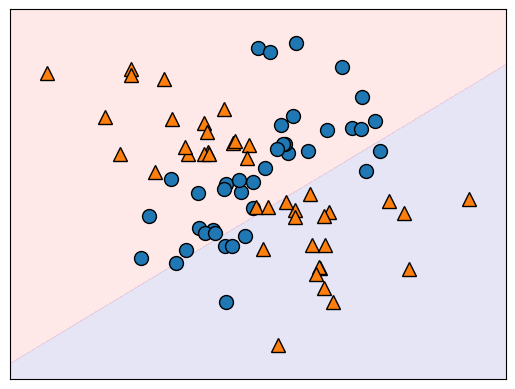

In [13]:
result_visualization(model_pctr, X_train, y_train)

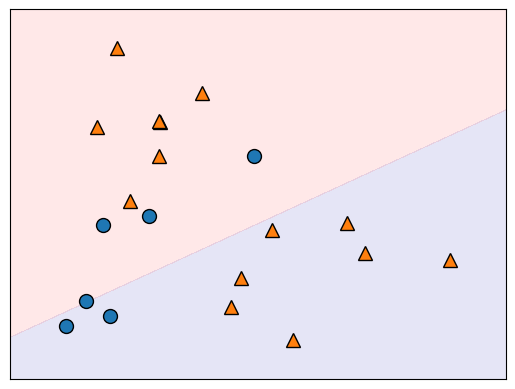

In [14]:
result_visualization(model_pctr, X_test, y_test)